In [ ]:
pip install ydata-profiling

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [80]:
# directory to the data folder
data_path = ('/content/sample_data/MyDrive/Dataset ')

print("Files in Dataset:")
os.listdir(data_path)

Files in Dataset:


['COVID-19 Coronavirus.csv', '.ipynb_checkpoints']

In [81]:
df = pd.read_csv('/content/sample_data/MyDrive/Dataset /COVID-19 Coronavirus.csv')
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [82]:
df.shape

(225, 10)

Information about the complete dataset

In [83]:
df.columns

Index(['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE', 'Population',
       'Continent', 'Total Cases', 'Total Deaths', 'Tot Cases//1M pop',
       'Tot Deaths/1M pop', 'Death percentage'],
      dtype='object')

In [96]:
df.isnull().sum()

Country                    0
Other names                1
ISO 3166-1 alpha-3 CODE    0
Population                 0
Continent                  0
Total Cases                0
Total Deaths               0
Tot Cases//1M pop          0
Tot Deaths/1M pop          0
Death percentage           0
dtype: int64

In [85]:
df.info() # Checking the Datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [86]:
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [97]:
columns=['Population', 'Total Cases', 'Total Deaths',
       'TC1Mpop', 'TD1Mpop', 'Death percentage']


Death Percentage

<Axes: ylabel='Country'>

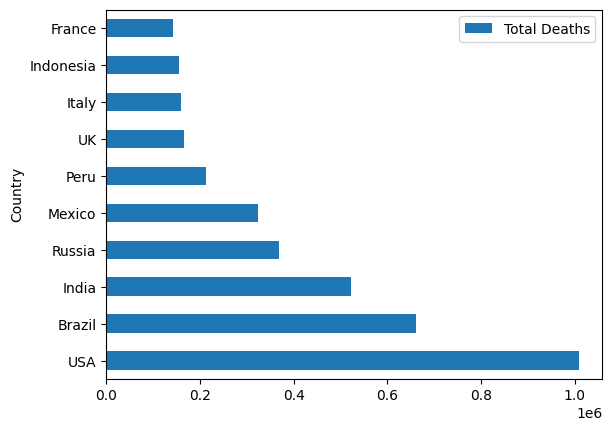

In [104]:
pd.DataFrame(df.groupby('Country')['Total Deaths'].sum().nlargest(10)).plot(kind='barh')


<Axes: ylabel='Country'>

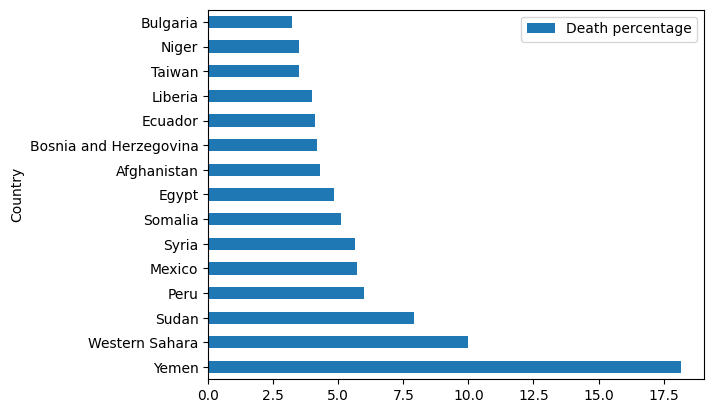

In [105]:
pd.DataFrame(df.groupby('Country')['Death percentage'].mean().nlargest(15)).plot(kind='barh')

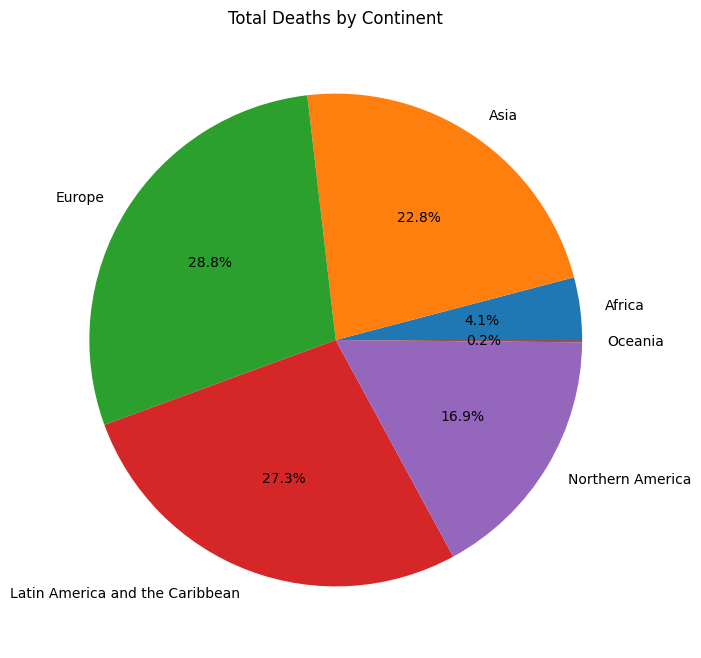

In [120]:
# Calculate total deaths by continent
total_deaths_by_continent = df.groupby('Continent')['Total Deaths'].sum()

# Plot a pie chart
total_deaths_by_continent.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Total Deaths by Continent')
plt.ylabel('')
plt.show()

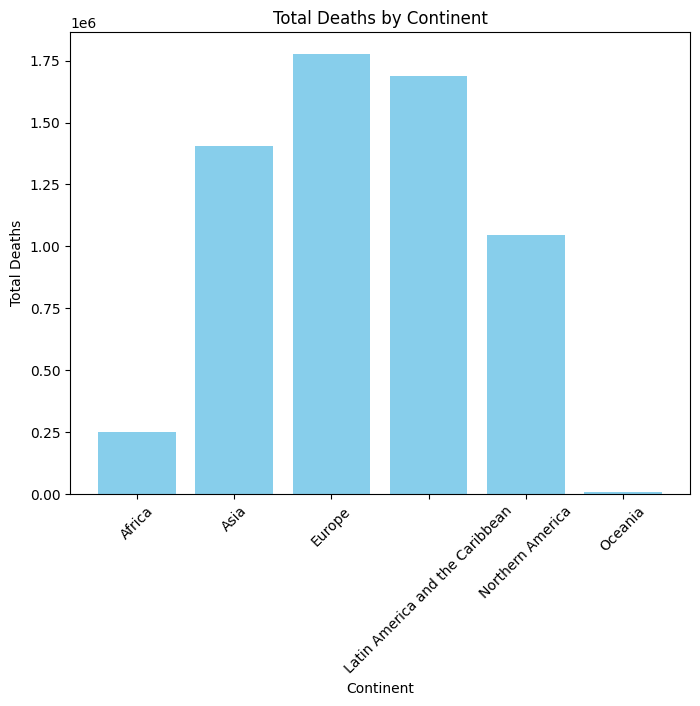

In [126]:
total_deaths_per_continent = df.groupby('Continent')['Total Deaths'].sum().reset_index()

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(total_deaths_per_continent['Continent'], total_deaths_per_continent['Total Deaths'], color='skyblue')
plt.xlabel('Continent')
plt.ylabel('Total Deaths')
plt.title('Total Deaths by Continent')
plt.xticks(rotation=45)
plt.show()

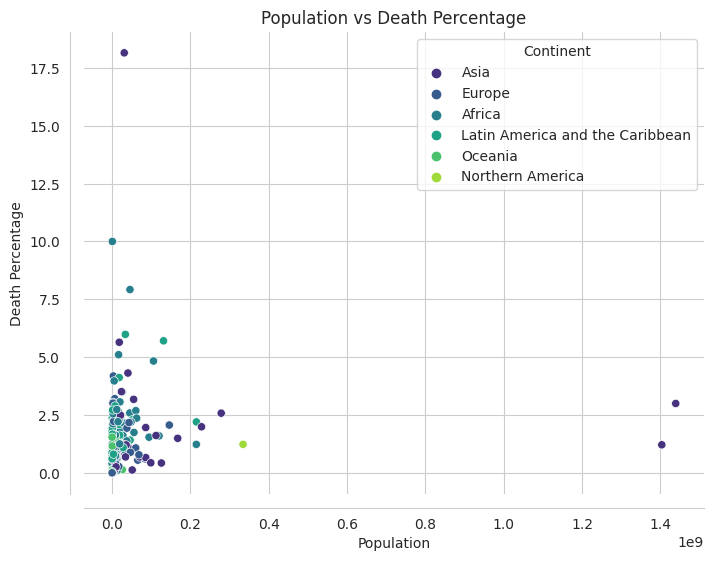

In [128]:
sns.set_style("whitegrid")

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Population', y='Death percentage', hue='Continent', palette='viridis')
plt.xlabel('Population')
plt.ylabel('Death Percentage')
plt.title('Population vs Death Percentage')
plt.legend(title='Continent')
sns.despine(offset=10)
plt.show()